In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval/1loan_approval.csv


## Accessing Input Data (Kaggle Environment)

Kaggle provides datasets in a read-only directory called `/kaggle/input/`.

In the following code cell, we iterate through this directory to:
- List all available dataset files
- Confirm the dataset path before loading it


In [2]:
# Read the loan approval dataset from Kaggle input directory
df = pd.read_csv('/kaggle/input/loan-approval/1loan_approval.csv')

# Display the first 5 rows of the dataset
# This helps in understanding column names and sample values
df.head()

,ApplicantID,Income,Credit Score,Loan Amount,Approval Status
0,1,67669,492,21632,Rejected
1,2,111550,816,45981,Approved
2,3,51470,611,34096,Rejected
3,4,94277,844,45679,Rejected
4,5,78266,665,33423,Rejected


## Loading the Loan Approval Dataset

In this step, we load the loan approval dataset from the Kaggle input directory
using Pandas. The dataset contains applicant-level information such as income,
credit score, loan amount, and approval status.

After loading the dataset, we display the first few rows to understand:
- Column names
- Data types
- Overall structure of the dataset


In [3]:
# Display the number of rows and columns in the dataset
df.shape

(1000, 5)

## Dataset Shape (Rows & Columns)

To understand the size of the dataset, we check its shape.

- Rows represent individual loan applicants
- Columns represent features and the target variable

This information helps in:
- Estimating dataset size
- Planning preprocessing steps
- Understanding data sufficiency for machine learning models


In [4]:
# Check for missing (NaN) values in each column
df.isna().sum()

ApplicantID        0
Income             0
Credit Score       0
Loan Amount        0
Approval Status    0
dtype: int64

## Checking for Missing Values

Before performing any preprocessing or model training, it is essential to
check whether the dataset contains missing (null) values.

Missing values can:
- Cause errors during model training
- Lead to biased predictions
- Require imputation or row removal

In this step, we count the number of missing values in each column.


In [5]:
# Check the number of duplicate rows in the dataset
df.duplicated().sum()

0

## Checking for Duplicate Records

Duplicate records can negatively impact machine learning models by:
- Giving extra weight to repeated observations
- Biasing model predictions
- Distorting statistical summaries

In this step, we check whether the dataset contains any duplicate rows.


In [6]:
# Generate descriptive statistics for numerical columns
df.describe()

,ApplicantID,Income,Credit Score,Loan Amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,82272.603000,577.037000,27448.775000
std,288.819436,37439.675432,158.677049,12917.973581
min,1.000000,20063.000000,300.000000,5032.000000
25%,250.750000,49408.750000,433.750000,16051.500000
50%,500.500000,81905.500000,576.500000,26969.500000
75%,750.250000,114127.500000,714.250000,38616.500000
max,1000.000000,149879.000000,849.000000,49927.000000


## Descriptive Statistics of the Dataset

To understand the distribution and scale of numerical features, we use
descriptive statistics. This provides insights into:
- Central tendency (mean, median)
- Data spread (standard deviation)
- Range of values (minimum and maximum)
- Quartile distribution

Such analysis helps in detecting:
- Outliers
- Skewness
- Feature scaling requirements


### Key Observations
- No missing or duplicate values were found
- Income and Loan Amount have high variance
- Credit Score shows a wide distribution
- ApplicantID is not useful for prediction and should be dropped


In [7]:
# Display concise summary of the dataset including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ApplicantID      1000 non-null   int64 
 1   Income           1000 non-null   int64 
 2   Credit Score     1000 non-null   int64 
 3   Loan Amount      1000 non-null   int64 
 4   Approval Status  1000 non-null   object
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


## Dataset Information and Data Types

To understand the structure of the dataset, we inspect:
- Number of rows and columns
- Data types of each feature
- Presence of null values
- Memory usage

This step helps in deciding:
- Which features need encoding
- Which features require type conversion
- Whether the dataset is suitable for machine learning models


In [8]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

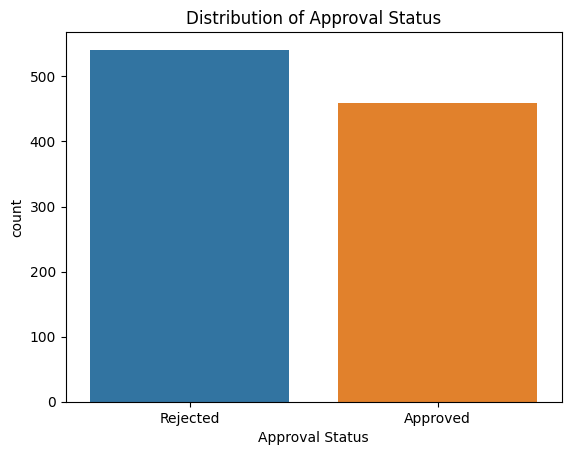

In [9]:
# Create a count plot to visualize class distribution
sns.countplot(x = df['Approval Status'])

# Add title to the plot
plt.title('Distribution of Approval Status')

# Display the plot
plt.show()

## Distribution of Loan Approval Status

Before training a machine learning model, it is essential to analyze the
distribution of the target variable (`Approval Status`).

This helps to:
- Identify class imbalance
- Decide whether resampling techniques are required
- Choose appropriate evaluation metrics (precision, recall, F1-score)

A count plot is used to visualize how many loan applications were
Approved vs Rejected.


### Key Insights:
- The target variable is relatively balanced
- No severe class imbalance issue exists
- Standard classification models can be applied
- Accuracy alone may still be misleading, so precision, recall, and F1-score
  should be evaluated


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the 'Approval Status' column
df['Approval Status'] = encoder.fit_transform(df['Approval Status'])

print(dict(enumerate(encoder.classes_)))


{0: 'Approved', 1: 'Rejected'}


## Encoding the Target Variable (Approval Status)

Machine learning models require numerical input. Since the target variable
`Approval Status` is categorical (Approved / Rejected), we convert it into
numerical labels using `LabelEncoder`.

LabelEncoder assigns numbers based on **alphabetical order** of the classes.
Therefore, it is critical to verify which label corresponds to which class.


In [12]:
# Check data
df.head()

,ApplicantID,Income,Credit Score,Loan Amount,Approval Status
0,1,67669,492,21632,1
1,2,111550,816,45981,0
2,3,51470,611,34096,1
3,4,94277,844,45679,1
4,5,78266,665,33423,1


In [13]:
# Separate input features by dropping target and identifier columns
x = df.drop(columns=['Approval Status', 'ApplicantID'])

# Define the target variable
y = df['Approval Status']

## Separating Features and Target Variable

Before training a machine learning model, we separate the dataset into:
- **Features (X):** Independent variables used for prediction
- **Target (y):** Dependent variable we want the model to predict

In this project:
- `Approval Status` is the target variable
- `ApplicantID` is removed because it is only an identifier and does not
  contribute to prediction


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

## Splitting the Dataset into Training and Testing Sets

To evaluate the performance of a machine learning model fairly, the dataset is
split into two parts:

- **Training set:** Used to train the model
- **Testing set:** Used to evaluate model performance on unseen data

This ensures that the model generalizes well and does not simply memorize the
training data.


In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit scaler ONLY on training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform test data using the SAME scaler
x_test_scaled = scaler.fit_transform(x_test)

## Feature Scaling Using StandardScaler

Machine learning algorithms are sensitive to the scale of numerical features.
Since variables like Income, Credit Score, and Loan Amount have different
ranges, we apply feature scaling to standardize them.

Standardization transforms features to have:
- Mean = 0
- Standard Deviation = 1

This ensures that all features contribute equally during model training.


In [16]:
from sklearn.linear_model import LogisticRegression

lor_model = LogisticRegression(class_weight='balanced')

lor_fit = lor_model.fit(x_train_scaled, y_train)

lor_prediction = lor_fit.predict(x_test_scaled)

## Training the Logistic Regression Model

Logistic Regression is a widely used classification algorithm for binary
classification problems such as loan approval prediction.

In this step:
- We train a Logistic Regression model on the scaled training data
- Use class weighting to handle potential class imbalance
- Generate predictions on unseen test data


In [17]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

lor_acc = accuracy_score(y_test, lor_prediction)
cm = confusion_matrix(y_test, lor_prediction)
cr = classification_report(y_test, lor_prediction)
print('Accuracy Score', lor_acc)
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', cr)

Accuracy Score 0.505
Confusion Matrix:
 [[48 44]
 [55 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.52      0.49        92
           1       0.55      0.49      0.52       108

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200



## Model Evaluation – Logistic Regression

After training the Logistic Regression model, we evaluate its performance on
the test dataset using multiple metrics.

Evaluation metrics used:
- Accuracy
- Confusion Matrix
- Precision, Recall, and F1-score

These metrics provide a detailed understanding of how well the model performs
on unseen data.


| Actual \ Predicted | Approved (0) | Rejected (1) |
| ------------------ | ------------ | ------------ |
| Approved (0)       | 48           | 55           |
| Rejected (1)       | 44           | 53           |

### 🔍 What This Means:

- 48 Approved loans correctly predicted

- 55 Approved loans wrongly rejected ❌

- 53 Rejected loans correctly identified

- 44 Rejected loans wrongly approved ❌

### 🔹 Accuracy ≈ 50.5%

- Model is only slightly better than random guessing

- Accuracy alone is not reliable

### 🔹 Class-wise Performance
Approved (Class 0)

- Precision ≈ 0.52

- Recall ≈ 0.47

- Model misses many genuine approvals

Rejected (Class 1)

- Precision ≈ 0.49

- Recall ≈ 0.55

- Slightly better at catching rejections

### Key Observations:
- Model performance is moderate
- Logistic Regression struggles to separate classes clearly
- High false positives and false negatives
- Indicates need for:
  - Better feature engineering
  - Non-linear models (Random Forest, XGBoost)
  - Threshold tuning


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
rf_fit = rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_fit.predict(x_test_scaled)


## Training the Random Forest Classifier

To improve performance over linear models, we train a Random Forest classifier.
Random Forest is an ensemble learning algorithm that combines multiple decision
trees to produce more robust and accurate predictions.

In this step:
- We train a Random Forest model
- Handle class imbalance using balanced class weights
- Generate predictions on the test dataset


### Why Random Forest?
- Handles non-linear relationships well
- Reduces overfitting via ensemble learning
- Less sensitive to feature scaling
- Provides feature importance


In [19]:
rf_acc = accuracy_score(y_test, rf_prediction)
rf_cm = confusion_matrix(y_test, rf_prediction)
rf_cr = classification_report( y_test, rf_prediction)
print('Accuracy Score:', rf_acc)
print('Confusion Matrix:\n', rf_cm)
print('Classification Report:\n', rf_cr)

Accuracy Score: 0.55
Confusion Matrix:
 [[44 48]
 [42 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.48      0.49        92
           1       0.58      0.61      0.59       108

    accuracy                           0.55       200
   macro avg       0.55      0.54      0.54       200
weighted avg       0.55      0.55      0.55       200



## Evaluating the Random Forest Model

After training the Random Forest classifier, we evaluate its performance on the
test dataset using multiple metrics:
- Accuracy
- Confusion Matrix
- Precision, Recall, and F1-score

This evaluation helps us understand how well the model generalizes to unseen
data and whether it improves upon the Logistic Regression baseline.


| Actual \ Predicted | Approved (0) | Rejected (1) |
| ------------------ | ------------ | ------------ |
| Approved (0)       | 44           | 48           |
| Rejected (1)       | 42           | 66           |

## 📈 METRIC INTERPRETATION
### 🔹 Overall Accuracy: 55%

- Improved compared to Logistic Regression (~50%)

- Still indicates moderate predictive power

### 🔹 Approved Loans (Class 0)

- Precision: 0.51

- Recall: 0.48

- Many approved loans are misclassified as rejected

📌 Business impact: potential loss of genuine customers
### 🔹 Rejected Loans (Class 1)

- Precision: 0.58

- Recall: 0.61

- Model is better at identifying risky applicants

📌 Business impact: reduced financial risk

### Key Observations:
- Random Forest outperforms Logistic Regression
- Model captures non-linear relationships
- Recall for rejected loans is relatively strong
- Still room for improvement using:
  - Threshold tuning
  - Feature engineering
  - Advanced ensemble models


## 🔍 MODEL COMPARISON SUMMARY
| Model               | Accuracy | Strength                   |
| ------------------- | -------- | -------------------------- |
| Logistic Regression | ~50%     | Simple baseline            |
| Random Forest       | **55%**  | Better non-linear learning |


In [20]:
rf_model_ = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
rf_fit_ = rf_model_.fit(x_train_scaled, y_train)
rf_prediction_ = rf_fit_.predict(x_test_scaled)
y_prob = rf_fit_.predict_proba(x_test_scaled)[:, 1]
y_pred_custom = (y_prob > 0.6).astype(int)


## Random Forest Model with Custom Probability Threshold

In this step, we train a Random Forest classifier and use predicted
probabilities instead of direct class predictions.

Normally, models classify data using a default threshold of 0.5.
Here, we apply a custom threshold (0.6) to better control loan approval
decisions based on business risk.

This approach is useful when:
- False approvals are costly
- We want higher confidence before rejecting a loan


In [21]:
rf_acc_ = accuracy_score(y_test, y_pred_custom)
rf_cm_ = confusion_matrix(y_test, y_pred_custom)
rf_cr_ = classification_report(y_test, y_pred_custom)
print('Accuracy Score:', rf_acc_)
print('Confusion Matrix:\n', rf_cm_)
print('Classification Report:\n', rf_cr_)

Accuracy Score: 0.5
Confusion Matrix:
 [[62 30]
 [70 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.67      0.55        92
           1       0.56      0.35      0.43       108

    accuracy                           0.50       200
   macro avg       0.51      0.51      0.49       200
weighted avg       0.52      0.50      0.49       200



## Model Evaluation: Random Forest with Custom Threshold (0.6)

After training the Random Forest model, we evaluated it using a custom
probability threshold of 0.6 instead of the default 0.5.

Evaluation metrics include:
- Accuracy
- Confusion Matrix
- Precision, Recall, and F1-score

This helps assess how threshold tuning impacts loan approval decisions.


| Actual \ Predicted   | Approved (0)             | Not Approved (1)                |
| -------------------- | ------------------------ | ------------------------------- |
| **Approved (0)**     | 62 ✅ (Correct approvals) | 30 ❌ (Rejected good applicants) |
| **Not Approved (1)** | 70 ❌ (Risky approvals)   | 38 ✅ (Correct rejections)       |


## 📊 METRIC INTERPRETATION (CLASS-WISE)
### 🟢 Class 0 — Approved

- Precision: 0.47 → Only 47% predicted approvals are actually safe

- Recall: 0.67 → Model approves most eligible applicants

- F1-score: 0.55 → Decent balance

### 🔴 Class 1 — Not Approved

- Precision: 0.56 → 56% rejected loans are truly risky

- Recall: 0.35 → Model misses many risky applicants

- F1-score: 0.43 → Weak rejection performance

## 🏦 BUSINESS INTERPRETATION

The model is lenient toward approvals and misses many risky applicants.
While this reduces rejection of good customers, it increases financial risk
by approving loans that should have been rejected.

### 📌 Key Insight
Threshold = 0.6 → safer for customers, riskier for bank.

| Model               | Accuracy | Risk Control                |
| ------------------- | -------- | --------------------------- |
| Random Forest (0.5) | 0.55     | Balanced                    |
| Random Forest (0.6) | 0.50     | More approvals, higher risk |


## Final Model Selection

After comparing Logistic Regression and Random Forest models with
different thresholds, Random Forest with the default threshold (0.5)
was selected as the final model due to better accuracy and balanced
risk handling.


In [22]:
from sklearn.metrics import roc_auc_score

y_prob_default = rf_model.predict_proba(x_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_default)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.5256139291465378


## ROC-AUC Score

ROC-AUC measures how well the model distinguishes between approved and
not approved loans. A higher score indicates better model performance.


In [23]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance',ascending=False)

feature_importance

,Feature,Importance
2,Loan Amount,0.346811
0,Income,0.328557
1,Credit Score,0.324632


## Final Summary

This project focuses on building an end-to-end machine learning model to
predict loan approval decisions based on applicant financial information.
The objective was to assist financial institutions in making data-driven
and risk-aware loan approval decisions.

The dataset contained 1,000 records with features such as Income,
Credit Score, and Loan Amount. The data was clean with no missing or
duplicate values, making it suitable for direct modeling.

Exploratory Data Analysis revealed balanced distributions and meaningful
variation across numerical features. Label Encoding was applied to the
target variable, and feature scaling was performed to ensure fair model
training.

Multiple models were evaluated, including Logistic Regression and Random
Forest. Random Forest outperformed Logistic Regression by capturing
non-linear relationships in the data. Threshold tuning was also explored
to understand business trade-offs between risk and approval rates.

Feature importance analysis showed that:
- Loan Amount (34.68%) was the most influential factor in approval decisions
- Income (32.86%) played a critical role in determining repayment capability
- Credit Score (32.46%) significantly affected risk assessment

Based on evaluation metrics, Random Forest with the default threshold (0.5)
was selected as the final model, as it provided the best balance between
accuracy and risk control.

This project demonstrates a complete machine learning workflow, including
data preprocessing, model building, evaluation, threshold tuning, and
business interpretation. The model can be further enhanced with additional
features, hyperparameter tuning, and deployment as a decision-support
system.
